# ¡Hola, Jefferson!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# Proyecto 9: Beta Bank

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos. Necesitamos predecir si un cliente dejará el banco pronto.

## Análisis Exploratorio de Datos

**Importar Librerias**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import seaborn as sns

**Importar Datasets**

In [2]:
data = pd.read_csv("/datasets/Churn.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Información sobre el dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [5]:
data.duplicated().sum()

0

Se puede identificar que los nombres de las columnas están bien y no hay valores duplicados.

Se encontró valores nulos en la columna 'Tenure'

## Eliminar Valores Nulos

In [6]:
# Calcular el porcentaje de valores nulos en la característica 'Tenure'
porcentaje_nulos = (data['Tenure'].isnull().sum() / len(data)) * 100
print("Porcentaje de valores nulos en 'Tenure':", porcentaje_nulos, "%")

Porcentaje de valores nulos en 'Tenure': 9.09 %


Como podemos observar, el porcentaje de valores nulos es de 9.09%. Debido a que es bajo, procederé a utilizar la mediana para trabajar los valores nulos ya que no generara sesgos en la distribución de datos.

In [7]:
# Manejar los valores nulos
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Cual es el porcentaje de nulos en **Tenure**? basado en esto, imputar por un valor fijo, como la mediana sobre todo el dataset no genera sesgos en la distribución de los datos?
</div>


In [8]:
# Verificar valores nulos después de eliminarlos
print("Valores nulos después de la imputación:")
print(data.isnull().sum())

Valores nulos después de la imputación:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Transformamos la variable Tenure en entero

In [9]:
data['Tenure']= data['Tenure'].astype(int)

Para tener una mejor visión de los datos, voy a eliminar las columnas que no sean relevantes para el analisis respectivo.

In [10]:
data.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Definir Tipo de Variables**

Voy a identificar las características para almacenarlas en 2 variables distintas y así me será mas facil graficarlas

In [12]:
# Identificar variables numéricas
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
print('Variables Numéricas:')
print(numeric_features)
print()
# Identificar variables categóricas
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print('Variables Categóricas:')
print(categorical_features)

Variables Numéricas:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Variables Categóricas:
['Geography', 'Gender']


## Gráficos

**Diagrama de Caja**

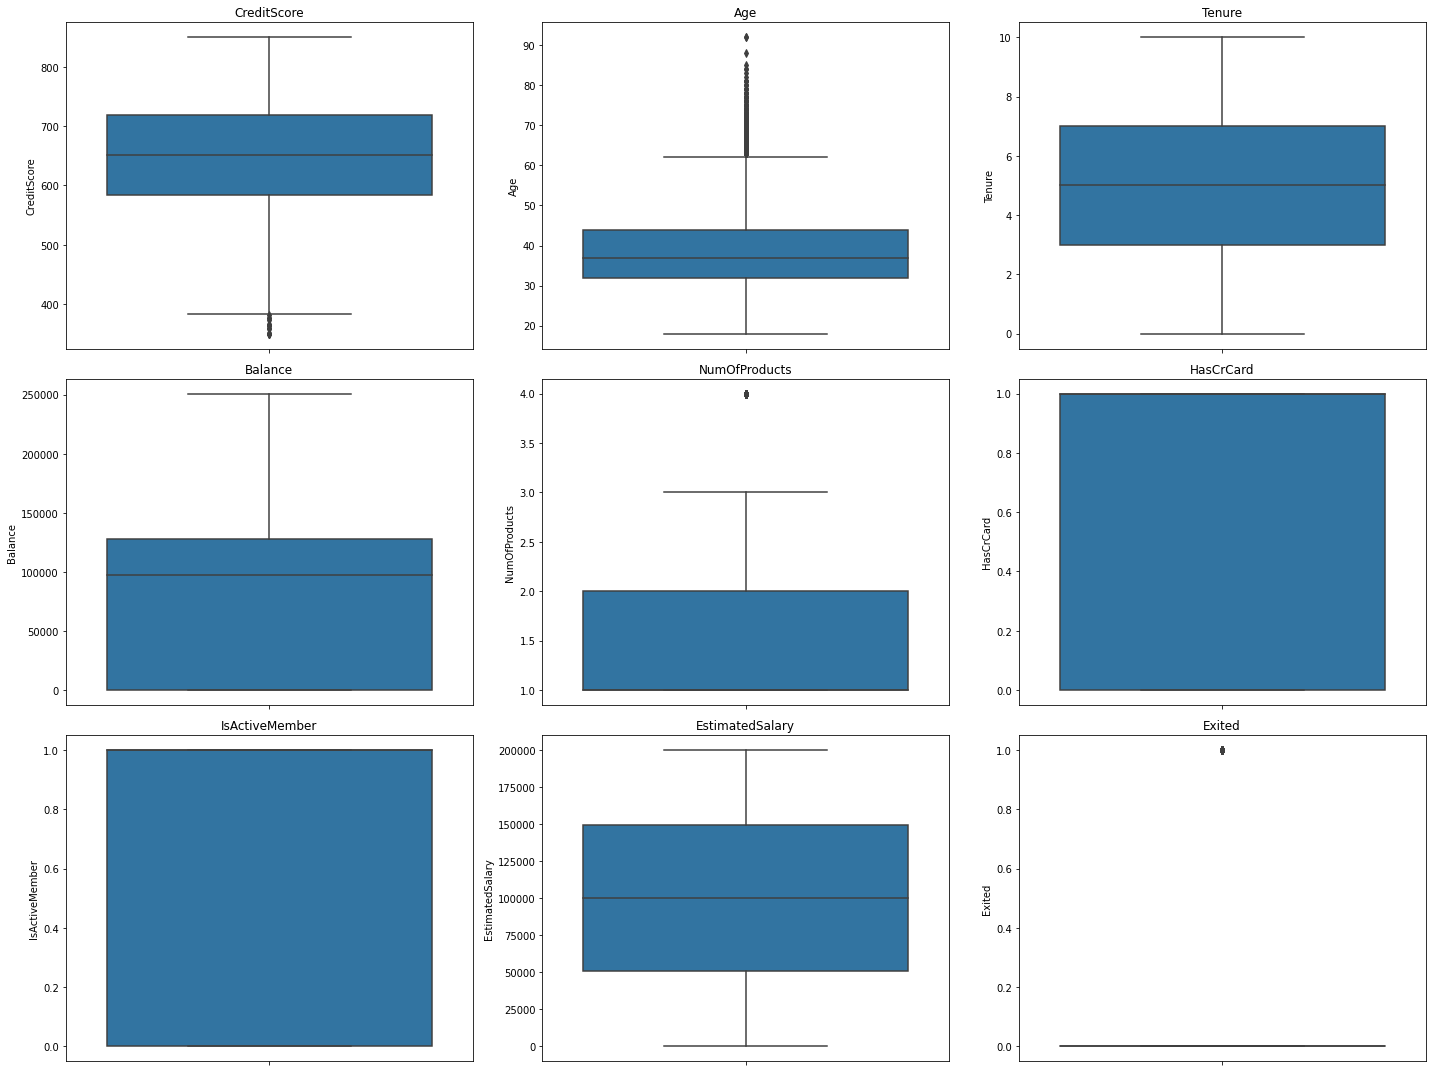

In [13]:
# Crear subgráficos para los diagramas de caja
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Crear diagramas de caja para las características numéricas
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=data, y=feature, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(feature)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()
plt.show()

- CreditScore: El puntaje de crédito promedio en el conjunto de datos es aproximadamente 650, con un rango que va desde 350 hasta 850. Esto sugiere que la mayoría de los clientes tienen puntajes de crédito dentro de un rango típico.

- Age: La edad promedio de los clientes es alrededor de 38 años, con una desviación estándar de aproximadamente 10.5 años. El rango de edad varía desde 18 años hasta 92 años, con la mayoría de los clientes concentrados en el rango de 32 a 44 años.

- Tenure: La duración promedio de la tenencia de los clientes es aproximadamente 5 años, con una desviación estándar de aproximadamente 2.76 años. La tenencia varía desde 0 años hasta 10 años, con la mayoría de los clientes teniendo una tenencia de 3 a 7 años.

- Balance: El saldo promedio en la cuenta de los clientes es de alrededor de 76485.89 unidades monetarias, con una gran variabilidad representada por una desviación estándar de aproximadamente 62397.41 unidades monetarias. El saldo varía desde 0 hasta 250898.09 unidades monetarias.

- NumOfProducts: En promedio, los clientes tienen alrededor de 1.53 productos financieros, con un rango que va desde 1 hasta 4 productos.

- EstimatedSalary: El salario estimado promedio de los clientes es de alrededor de 100090.24 unidades monetarias, con una gran variabilidad representada por una desviación estándar de aproximadamente 57510.49 unidades monetarias. El salario estimado varía desde 11.58 hasta 199992.48 unidades monetarias.

**Graficós de Barras**

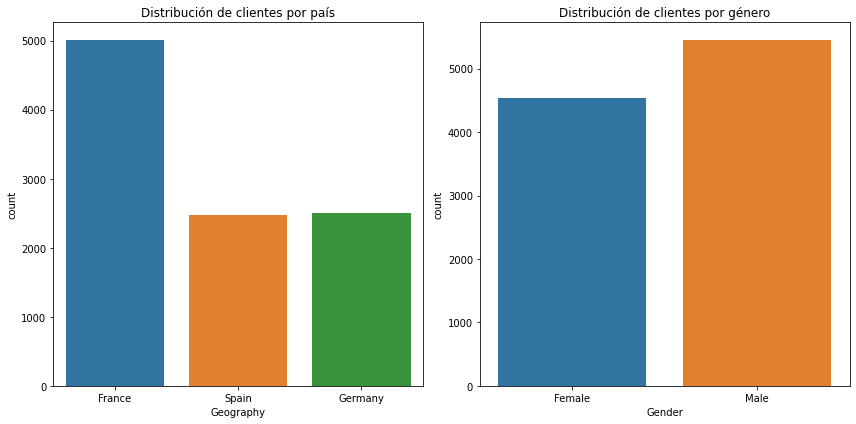

In [14]:
# Crear figura y ejes para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para la característica Geography
sns.countplot(data=data, x='Geography', ax=axes[0])
axes[0].set_title('Distribución de clientes por país')

# Gráfico de barras para la característica Gender
sns.countplot(data=data, x='Gender', ax=axes[1])
axes[1].set_title('Distribución de clientes por género')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()

 - Observamos que la mayoría de los clientes en el conjunto de datos provienen de tres países: Francia, España y Alemania. Francia tiene el mayor número de clientes, seguido de cerca por España, mientras que Alemania tiene un número significativamente menor de clientes en comparación con los otros dos países.
 - En cuanto a la distribución por género, observamos que hay una proporción aproximadamente igual de clientes masculinos y femeninos en el conjunto de datos. Esto sugiere que el banco tiene una base de clientes bastante equilibrada en términos de género, lo que podría ser útil para realizar análisis posteriores o para diseñar estrategias de marketing más inclusivas.

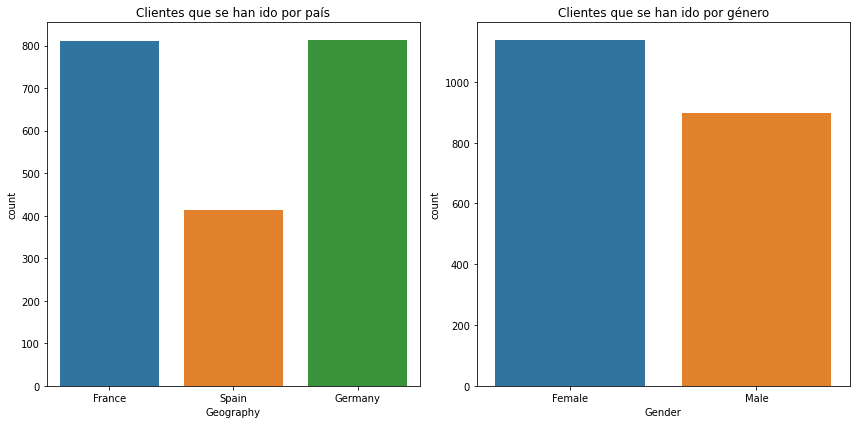

In [15]:
# Filtrar el DataFrame para incluir solo los clientes que se han ido del banco (Exited=1)
exited_customers = data[data['Exited'] == 1]

# Crear figura y ejes para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para la característica Geography
sns.countplot(data=exited_customers, x='Geography', ax=axes[0])
axes[0].set_title('Clientes que se han ido por país')

# Gráfico de barras para la característica Gender
sns.countplot(data=exited_customers, x='Gender', ax=axes[1])
axes[1].set_title('Clientes que se han ido por género')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()

- Al parecer Francia y Alemania muestran mayor indice de clientes que decidieron irse del banco
- En cuanto al genero podemos observar una ligera inclinación de mujeres que se van del banco frente a los hombres

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran analisis de las variables
</div>


Ahora procederemos a convertir las variables categoricas a numéricas

In [16]:
# Codificar variables categóricas
data_ohe = pd.get_dummies(data=data, dummy_na=False )
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [17]:
corr_matrix = data_ohe.corr()
corr_with_exited = data_ohe.corr()['Exited'].sort_values(ascending=False)

print(corr_with_exited)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.015989
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


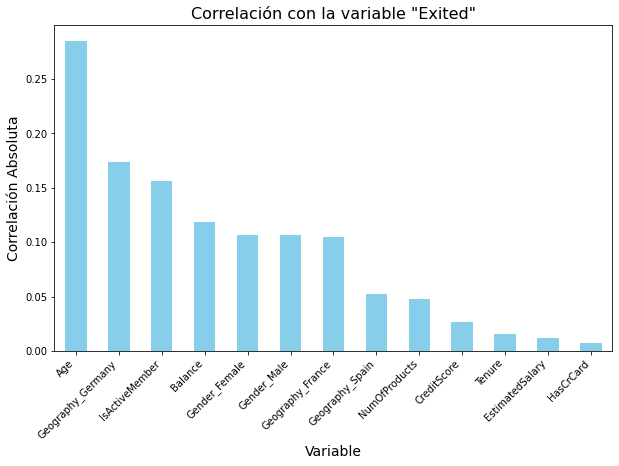

In [18]:
# Ordenar las correlaciones por valor absoluto
corr_with_exited_abs = corr_with_exited.abs().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
corr_with_exited_abs.drop('Exited').plot(kind='bar', color='skyblue')
plt.title('Correlación con la variable "Exited"', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Correlación Absoluta', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

- La edad (Age) tiene la correlación más fuerte positiva con la variable objetivo 'Exited', lo que indica que los clientes más mayores tienden a dejar el banco más frecuentemente.
- La membresía activa (IsActiveMember) tiene una correlación negativa relativamente fuerte con 'Exited', lo que sugiere que los clientes inactivos son más propensos a dejar el banco.
- El género masculino (Gender_Male) tiene una correlación negativa con 'Exited', mientras que el género femenino (Gender_Female) tiene una correlación positiva, lo que sugiere una ligera diferencia en la tasa de abandono entre géneros.
- La geografía también parece tener alguna correlación con 'Exited', especialmente la categoría 'Germany', que tiene una correlación positiva más alta que las otras categorías de geografía.

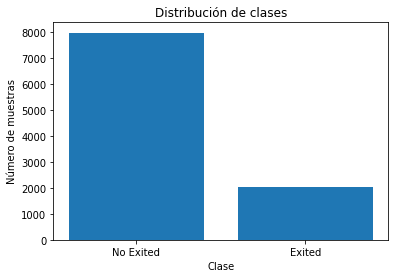

Distribución de clases:
0    7963
1    2037
Name: Exited, dtype: int64


In [19]:
# Calcular la distribución de las clases
class_counts = data['Exited'].value_counts()

# Visualizar la distribución de clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Distribución de clases')
plt.xticks(class_counts.index, ['No Exited', 'Exited'])
plt.show()

print("Distribución de clases:")
print(class_counts)

**Segmentación de los datos**

In [20]:
# Separar las características (features) y el objetivo (target)
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

# Dividir los datos en entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)


## Modelos

In [21]:
# Modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Definir el espacio de búsqueda de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [1, 10, 20],  # Profundidad máxima de cada árbol
}

# Inicializar GridSearchCV con el modelo de Bosque Aleatorio y el espacio de búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(estimator=models['Random Forest'], param_grid=param_grid_rf, cv=5, scoring='f1')

# Entrenar y evaluar cada modelo
results = []
for name, model in models.items():
    if name == 'Random Forest':
        grid_search_rf.fit(features_train, target_train)
        best_model = grid_search_rf.best_estimator_
    else:
        model.fit(features_train, target_train)
        best_model = model
        
    # Evaluar el modelo en el conjunto de prueba
    test_predictions = best_model.predict(features_test)
    accuracy = accuracy_score(target_test, test_predictions)
    precision = precision_score(target_test, test_predictions)
    recall = recall_score(target_test, test_predictions)
    f1 = f1_score(target_test, test_predictions)
    conf_matrix = confusion_matrix(target_test, test_predictions)
    
    # Guardar los resultados
    results.append([name, accuracy, precision, recall, f1, conf_matrix])

 # Imprimir los resultados
    print(f"Modelo: {name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Confusion Matrix:\n{conf_matrix}\n")

Modelo: Random Forest
  Accuracy: 0.8500
  Precision: 0.7564
  Recall: 0.4411
  F1 Score: 0.5573
  Confusion Matrix:
[[1889   76]
 [ 299  236]]

Modelo: Decision Tree
  Accuracy: 0.7740
  Precision: 0.4735
  Recall: 0.5009
  F1 Score: 0.4868
  Confusion Matrix:
[[1667  298]
 [ 267  268]]

Modelo: Logistic Regression
  Accuracy: 0.7816
  Precision: 0.4286
  Recall: 0.0617
  F1 Score: 0.1078
  Confusion Matrix:
[[1921   44]
 [ 502   33]]



El modelo Random Forest parece ser el más efectivo en términos generales, ya que tiene la mejor combinación de métricas de evaluación y principalmente un F1 mas alto que los demás pero no es suficiente para aprobar.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Muy buena forma de aplicar todos los modelos en conjuto para la comparativa!    
</div>


## Sobremuestreo y Submuestreo

In [22]:
# Dividir los datos en conjuntos de entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Función para realizar el sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

# Función para realizar el submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [23]:
# Sobremuestreo
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
# Submuestreo
features_downsampled, target_downsampled = downsample(features_train, target_train, fraction=0.1)

**Bosque Aleatorio**

In [24]:
# Inicializar y entrenar el modelo RandomForestClassifier
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(features_upsampled, target_upsampled)

# Predecir en el conjunto de validación y calcular el puntaje F1
predicted_valid_rf = model_rf.predict(features_valid)
f1_rf = f1_score(target_valid, predicted_valid_rf)

print('F1 Score RandomForest (upsampled):', f1_rf)

F1 Score RandomForest (upsampled): 0.6059979317476731


In [25]:
# Inicializar y entrenar el modelo RandomForestClassifier con submuestreo
model_rf_downsampled = RandomForestClassifier(random_state=12345)
model_rf_downsampled.fit(features_downsampled, target_downsampled)

# Predecir en el conjunto de validación y calcular el puntaje F1
predicted_valid_rf_downsampled = model_rf_downsampled.predict(features_valid)
f1_rf_downsampled = f1_score(target_valid, predicted_valid_rf_downsampled)

print('F1 Score RandomForest (downsampled):', f1_rf_downsampled)

F1 Score RandomForest (downsampled): 0.49617931737137044


**Arbol de Decision**

In [26]:
# Inicializar y entrenar el modelo DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(features_upsampled, target_upsampled)

# Predecir en el conjunto de validación y calcular el puntaje F1
predicted_valid_dt = model_dt.predict(features_valid)
f1_dt = f1_score(target_valid, predicted_valid_dt)

print('F1 Score DecisionTree:(upsampled)', f1_dt)

F1 Score DecisionTree:(upsampled) 0.4723032069970845


In [27]:
# Inicializar y entrenar el modelo DecisionTreeClassifier con submuestreo
model_dt_downsampled = DecisionTreeClassifier(random_state=12345)
model_dt_downsampled.fit(features_downsampled, target_downsampled)

# Predecir en el conjunto de validación y calcular el puntaje F1
predicted_valid_dt_downsampled = model_dt_downsampled.predict(features_valid)
f1_dt_downsampled = f1_score(target_valid, predicted_valid_dt_downsampled)

print('F1 Score DecisionTree (downsampled):', f1_dt_downsampled)

F1 Score DecisionTree (downsampled): 0.46244635193133055


**Regresión Logística**

In [28]:
# Inicializar y entrenar el modelo LogisticRegression
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)

# Predecir en el conjunto de validación y calcular el puntaje F1
predicted_valid_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_valid_lr)

print('F1 Score LogisticRegression (upsampled):', f1_lr)

F1 Score LogisticRegression (upsampled): 0.38077769625825386


In [29]:
# Inicializar y entrenar el modelo LogisticRegression con submuestreo
model_lr_downsampled = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_downsampled.fit(features_downsampled, target_downsampled)

# Predecir en el conjunto de validación y calcular el puntaje F1
predicted_valid_lr_downsampled = model_lr_downsampled.predict(features_valid)
f1_lr_downsampled = f1_score(target_valid, predicted_valid_lr_downsampled)

print('F1 Score LogisticRegression (downsampled):', f1_lr_downsampled)

F1 Score LogisticRegression (downsampled): 0.380080556572684


Random Forest (Sobremuestreo): Obtuvo el puntaje F1 más alto de todos los modelos y estrategias de muestreo, con un valor de aproximadamente 0.606. Esto sugiere que el modelo Random Forest entrenado con sobremuestreo es el que mejor equilibra la precisión y la exhaustividad en la predicción de la clase positiva (en este caso, la predicción de los clientes que abandonan el servicio).

## AUC - ROC

In [30]:
# Calcular AUC-ROC y compararlo con F1 para Random Forest con datos de sobremuestreo
probs_rf_upsampled = model_rf.predict_proba(features_valid)[:, 1]
auc_roc_rf_upsampled = roc_auc_score(target_valid, probs_rf_upsampled)
print('AUC-ROC RandomForest (upsampled):', auc_roc_rf_upsampled)

# Calcular AUC-ROC y compararlo con F1 para Random Forest con datos de submuestreo
probs_rf_downsampled = model_rf_downsampled.predict_proba(features_valid)[:, 1]
auc_roc_rf_downsampled = roc_auc_score(target_valid, probs_rf_downsampled)
print('AUC-ROC RandomForest (downsampled):', auc_roc_rf_downsampled)

# Calcular AUC-ROC y compararlo con F1 para Árbol de Decisión con datos de sobremuestreo
probs_dt_upsampled = model_dt.predict_proba(features_valid)[:, 1]
auc_roc_dt_upsampled = roc_auc_score(target_valid, probs_dt_upsampled)
print('AUC-ROC DecisionTree (upsampled):', auc_roc_dt_upsampled)

# Calcular AUC-ROC y compararlo con F1 para Árbol de Decisión con datos de submuestreo
probs_dt_downsampled = model_dt_downsampled.predict_proba(features_valid)[:, 1]
auc_roc_dt_downsampled = roc_auc_score(target_valid, probs_dt_downsampled)
print('AUC-ROC DecisionTree (downsampled):', auc_roc_dt_downsampled)

# Calcular AUC-ROC y compararlo con F1 para Regresión Logística con datos de sobremuestreo
probs_lr_upsampled = model_lr.predict_proba(features_valid)[:, 1]
auc_roc_lr_upsampled = roc_auc_score(target_valid, probs_lr_upsampled)
print('AUC-ROC LogisticRegression (upsampled):', auc_roc_lr_upsampled)

# Calcular AUC-ROC y compararlo con F1 para Regresión Logística con datos de submuestreo
probs_lr_downsampled = model_lr_downsampled.predict_proba(features_valid)[:, 1]
auc_roc_lr_downsampled = roc_auc_score(target_valid, probs_lr_downsampled)
print('AUC-ROC LogisticRegression (downsampled):', auc_roc_lr_downsampled)

AUC-ROC RandomForest (upsampled): 0.844627238353428
AUC-ROC RandomForest (downsampled): 0.8450671803286485
AUC-ROC DecisionTree (upsampled): 0.6632351192599463
AUC-ROC DecisionTree (downsampled): 0.674305010582388
AUC-ROC LogisticRegression (upsampled): 0.7271123159972415
AUC-ROC LogisticRegression (downsampled): 0.730414972295546


Tanto el modelo de Random Forest con sobremuestreo como el de submuestreo muestran AUC-ROC muy similares, con valores alrededor de 0.845. Esto sugiere que ambos modelos tienen un buen rendimiento en la capacidad de clasificación de las clases positivas y negativas.

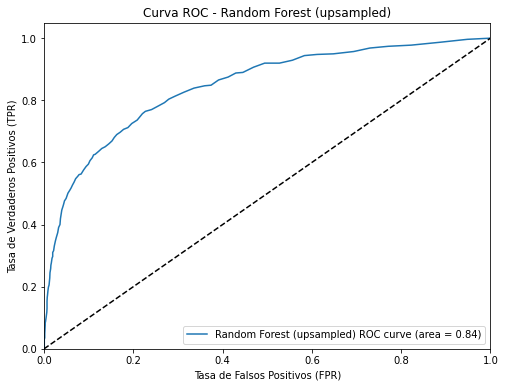

In [31]:
# Calcular probabilidades de predicción para el conjunto de validación
probs_rf_upsampled = model_rf.predict_proba(features_valid)[:, 1]

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(target_valid, probs_rf_upsampled)

# Calcular el área bajo la curva ROC (AUC-ROC)
auc_roc_rf_upsampled = roc_auc_score(target_valid, probs_rf_upsampled)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (upsampled) ROC curve (area = %0.2f)' % auc_roc_rf_upsampled)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base (AUC-ROC de un clasificador aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest (upsampled)')
plt.legend(loc="lower right")
plt.show()

## Conclusión

Se realizó una exploración exhaustiva de los datos, incluida la identificación y manejo de valores faltantes, la visualización de distribuciones de variables y la comprensión de la relación entre las características y la variable objetivo.

Se implementaron varios modelos de aprendizaje supervisado, incluyendo Random Forest, Árbol de Decisión y Regresión Logística. Además, se utilizó GridSearchCV para ajustar los hiperparámetros del modelo Random Forest, lo que demuestra un enfoque riguroso para mejorar el rendimiento del modelo.

Se evaluaron los modelos utilizando métricas de rendimiento estándar como precisión, exhaustividad, puntuación F1 y matriz de confusión. Esto proporciona una comprensión completa del rendimiento de los modelos en la clasificación de clientes que abandonan el banco.

Se implementaron técnicas de sobremuestreo y submuestreo para abordar el problema del desequilibrio de clases en el conjunto de datos

Finalmente el Bosque Aleatorio destacó debido a su capacidad para manejar conjuntos de datos con múltiples características, su resistencia al sobreajuste y su capacidad para manejar relaciones no lineales entre las variables predictoras y la variable objetivo, consiguiendo un F1 mayor que los demás modelos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis en general de todso los modelos en combinación de las técnicas de muestro y submuestreo
</div>
